In [1]:
!pip install wordcloud

In [2]:
!pip install missingno

In [3]:
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
from google.colab import files


df = pd.read_csv("https://github.com/jy617lee/popular_restaurants_from_officials/raw/master/raw.csv", index_col="연번")
df.shape


(51456, 9)

In [6]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [7]:
df.isnull().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [8]:
df_na = df[df['집행일시'].isna()]
df_na

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.shape)
df.drop(df_na.index[0], inplace=True)
df.shape

(51456, 9)


(51455, 9)

In [10]:
print(df.shape)
df['집행일시'] = pd.to_datetime(df['집행일시'])
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day
df['시'] = df['집행일시'].dt.hour
df['요일'] = df['집행일시'].dt.dayofweek.astype(int)
print(df.shape)

(51455, 9)
(51455, 15)


In [11]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소,연,월,연월,일,시,요일
연번,,,,,,,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,2018-1,19,20,4
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,2018-1,23,19,1
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,2018-1,29,20,0
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,4
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,2018-1,12,9,4


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


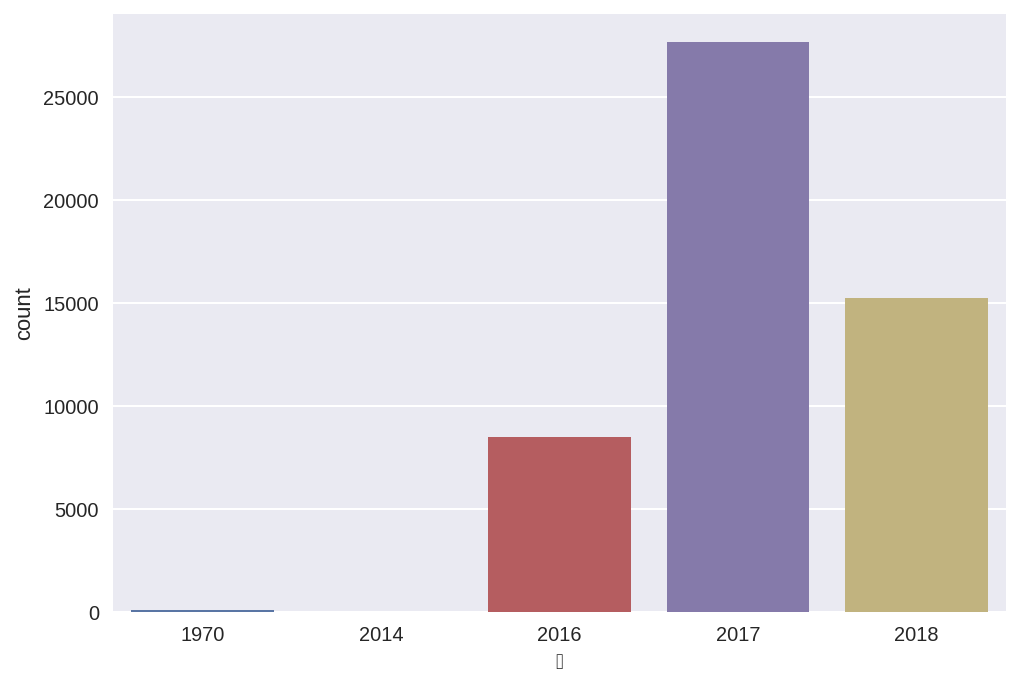

In [12]:
sns.countplot(data=df, x='연')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


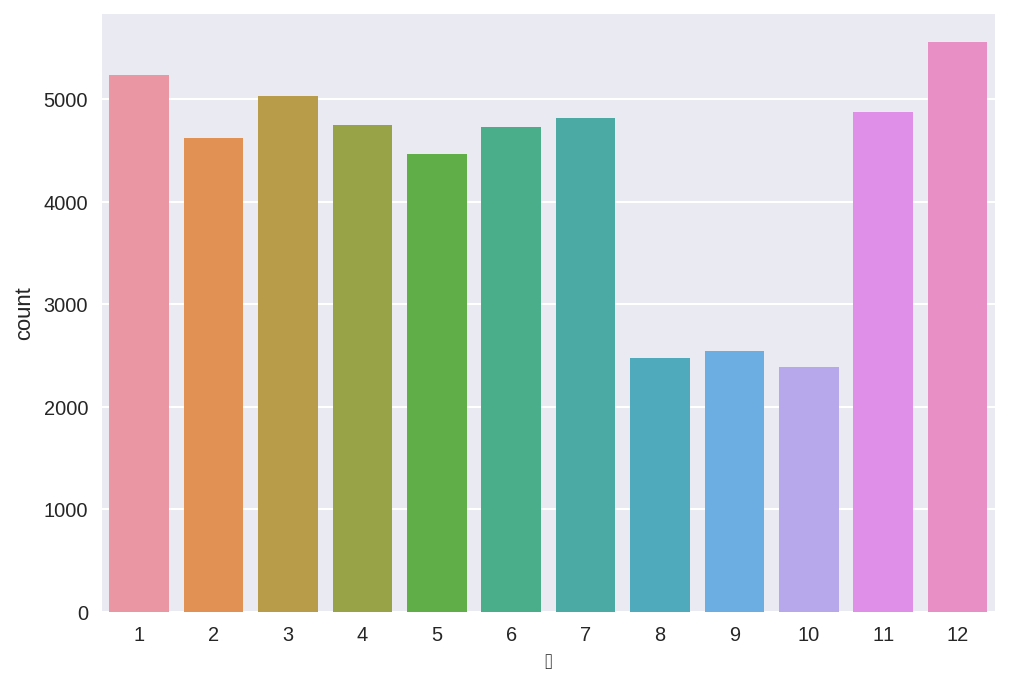

In [13]:
sns.countplot(data=df, x='월')

In [14]:
weekday_map= {0:'월', 1:'화', 2:'수', 3:'목',
              4:'금', 5:'토', 6:'일'}
df["요일_한글"] = df["요일"].apply(lambda x : weekday_map[x])
df["요일_한글"].head()

연번
1    금
2    화
3    월
4    금
5    금
Name: 요일_한글, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


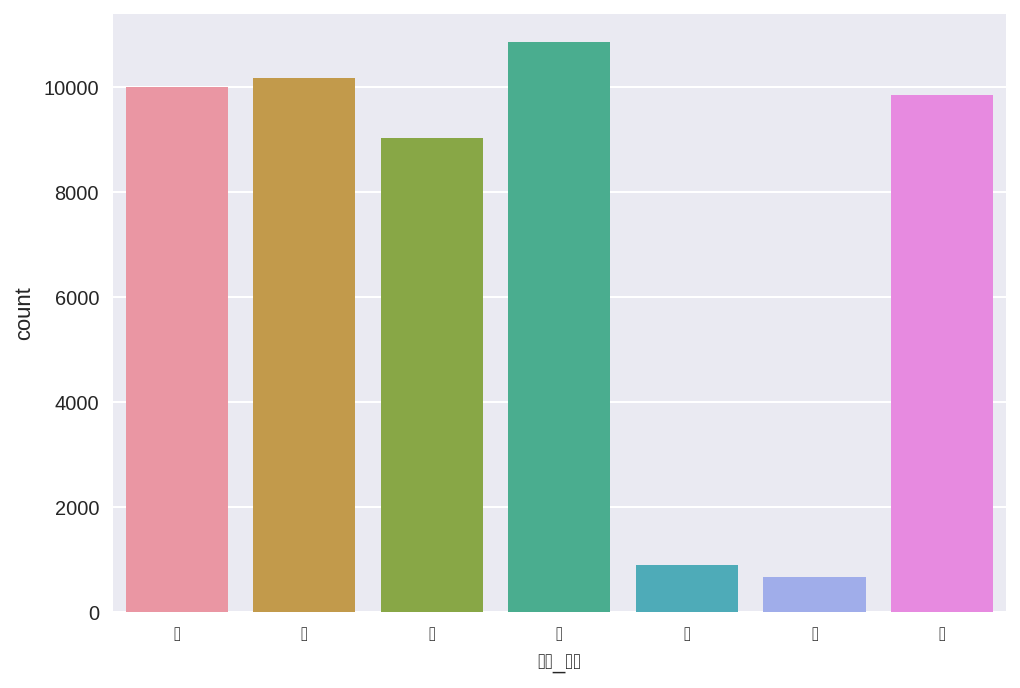

In [15]:
sns.countplot(data=df, x='요일_한글')

In [17]:
df['집행목적'] = df['집행목적'].fillna('')
spend_gubun = ' '.join(df['집행목적'])
spend_gubun[:100]

'시정 정책추진 자문 간담회 시정 청년 정책 의견수렴 간담회 시정 주요 경제정책 현안추진 의견수렴 간담회 시정종교계 의견수렴 간담회 시정 정책 추진 의견수렴 간담회 시정 정책 추진 '

In [0]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

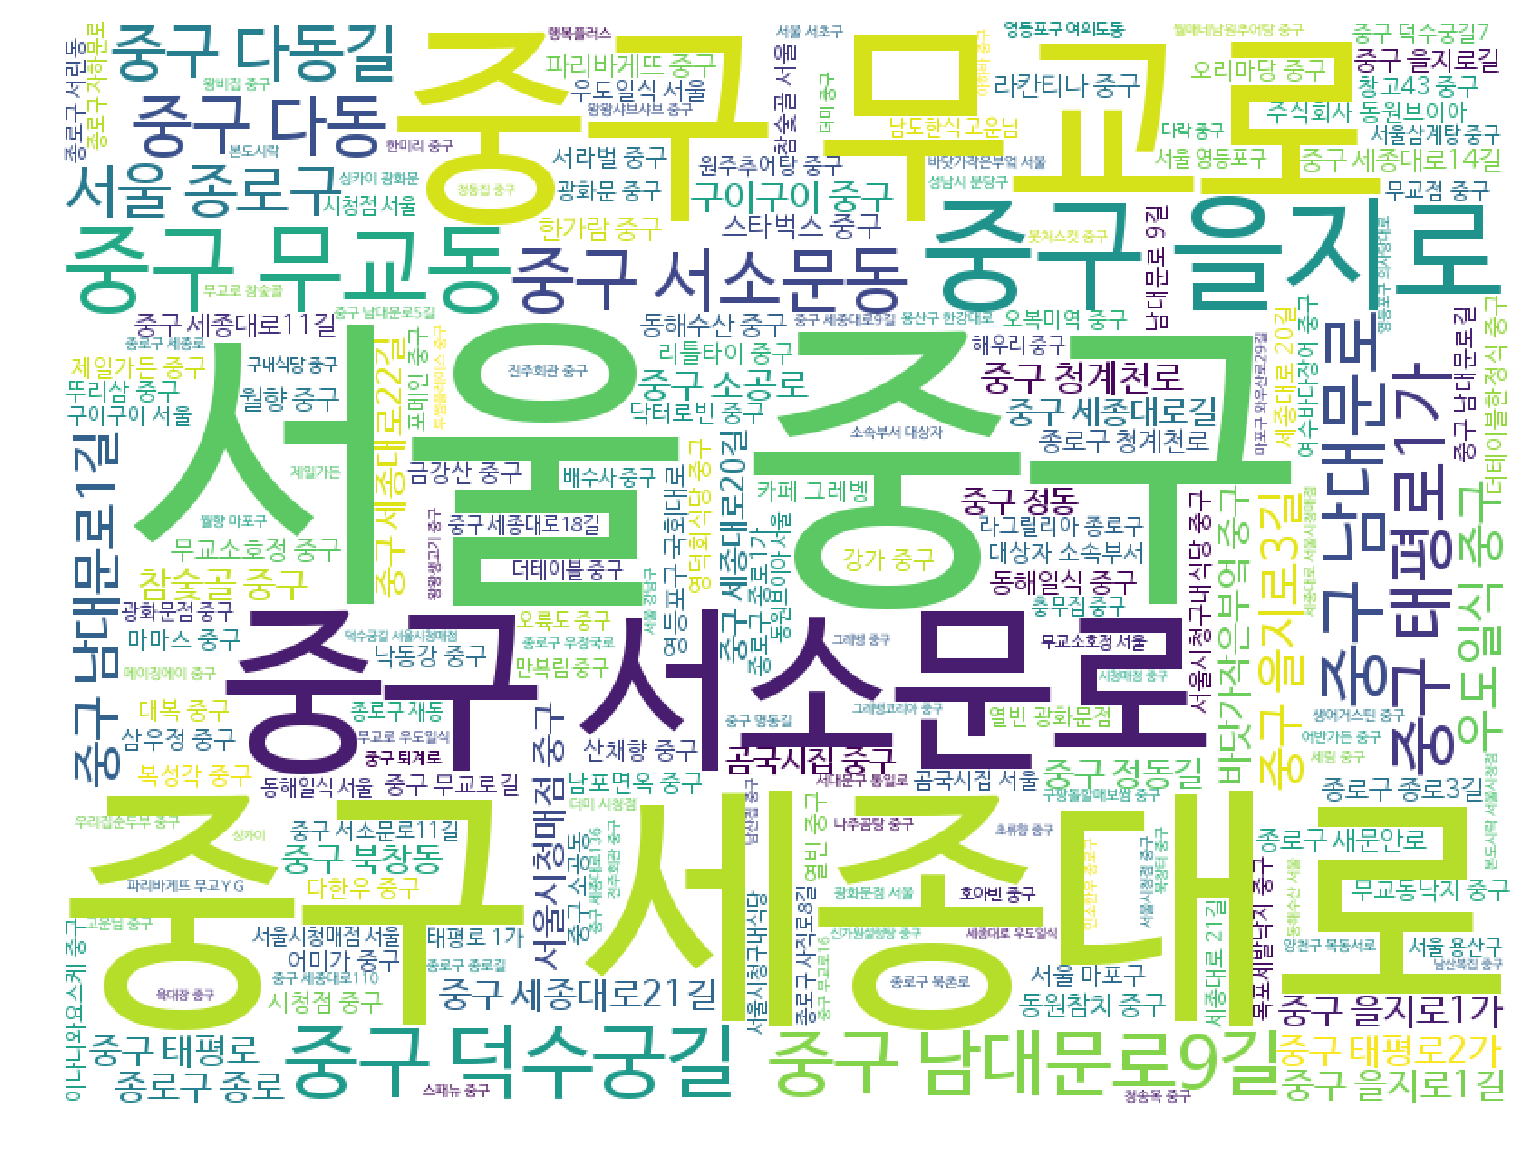

In [20]:
displayWordCloud(" ".join(df["집행장소"].fillna('')))

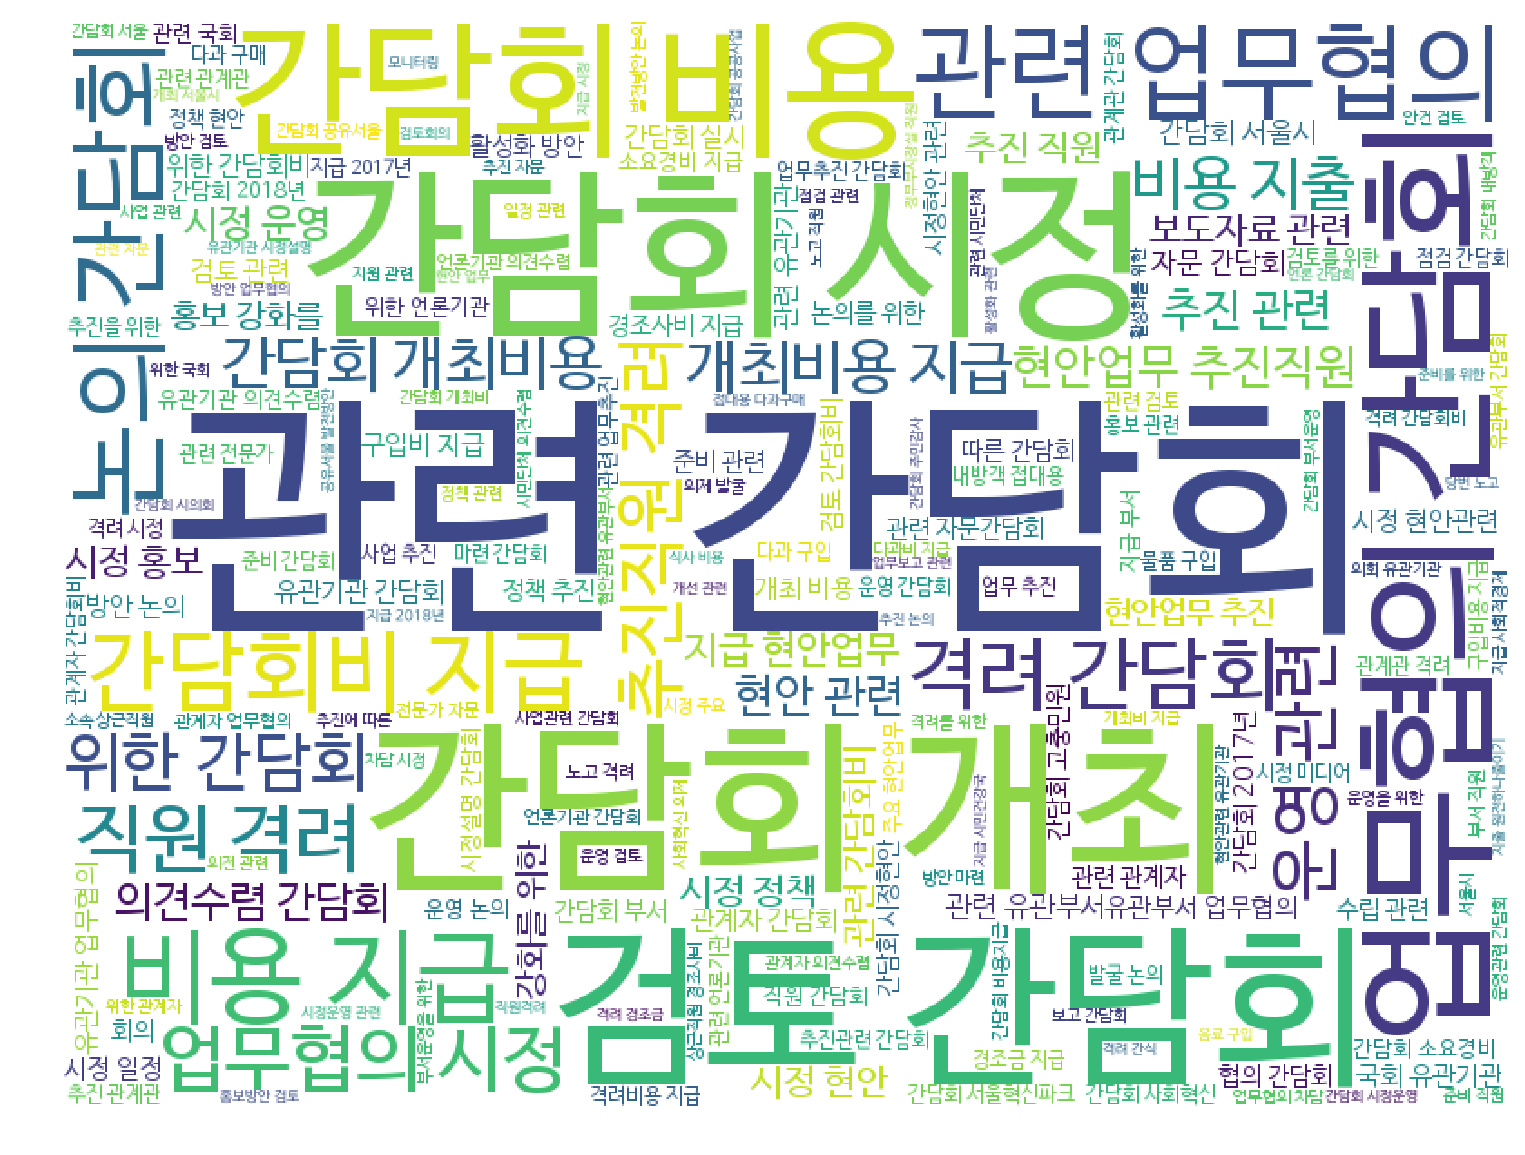

In [21]:
displayWordCloud(" ".join(df["집행목적"].fillna('')))

In [22]:
df['집행장소'].value_counts()

-                            522
대상자 소속부서                     199
서울시청구내식당                     134
참숯골(중구 무교로 16)               110
서울시청매점 (중구 덕수궁길)             110
참숯골(서울 중구 무교로 16)            105
우도일식(서울 중구 세종대로 124)         102
참숯골 (중구 무교로 16)               94
구이구이 (중구 을지로)                 91
참숯골 (중구 무교로)                  90
우도일식(중구 태평로1가)                88
더테이블한정식(중구 세종대로)              84
참숯골(중구 무교로)                   84
동해일식(서울 중구 무교로 16)            82
우도일식 (중구 세종대로)                80
곰국시집(서울 중구 무교로 24)            78
라칸티나 (중구 을지로)                 78
참숯골                           77
바닷가작은부엌(중구 덕수궁길)              77
참숯골 (서울 중구 무교로 16)            72
서울시청매점                        70
스타벅스 (중구 소공로)                 70
동해일식(중구 무교동)                  67
서울시청매점(중구 덕수궁길)               67
동원참치(중구 세종대로)                 66
서울시청매점 (중구 덕수궁길 15)           64
구이구이                          61
우도일식 (중구 태평로1가)               61
서울시청매점(중구 덕수궁길 15)            61
동해수산(서울 중구 무교로 16)            60
          

In [0]:
df['집행장소'] = df['집행장소'].fillna('')
df['상호명'] = df['집행장소'].apply(lambda x : x.split('(')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('서울 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('중구 ')[0].strip())
df['상호명'] = df['상호명'].apply(lambda x : x.split('종로구 ')[0].strip())

In [24]:
df_shop = df.loc[ (df['상호명'] != '-') & (df['상호명'] != '')  & (df['상호명'] != '대상자 소속부서') ]

print(df.shape)
print(df_shop.shape)

(51455, 17)
(50428, 17)


In [25]:
df_shop['상호명'].value_counts().head(30)

참숯골           806
우도일식          759
서울시청매점        718
구이구이          658
곰국시집          518
서울시청구내식당      429
동해일식          405
무교소호정         393
동해수산          359
스타벅스          322
바닷가작은부엌       320
라칸티나          318
한가람           317
동원참치          308
더테이블한정식       306
제일가든          288
어미가           281
삼우정           280
오리마당          266
파리바게뜨         261
복성각           257
월향            257
남포면옥          235
열빈            233
무교동낙지         230
포메인           226
（주）바닷가작은부엌    223
마마스           219
서라벌           207
오복미역          206
Name: 상호명, dtype: int64

In [26]:
df_shop.loc[df_shop['상호명'] == '（주）바닷가작은부엌', "상호명"] = "바닷가작은부엌"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
top_50 = df_shop['상호명'].value_counts().head(50)
top_50 = pd.DataFrame(top_50).reset_index()
top_50.columns = ['상호명', '횟수']
top_50

,상호명,횟수
0,참숯골,806
1,우도일식,759
2,서울시청매점,718
3,구이구이,658
4,바닷가작은부엌,543
5,곰국시집,518
6,서울시청구내식당,429
7,동해일식,405
8,무교소호정,393
9,동해수산,359


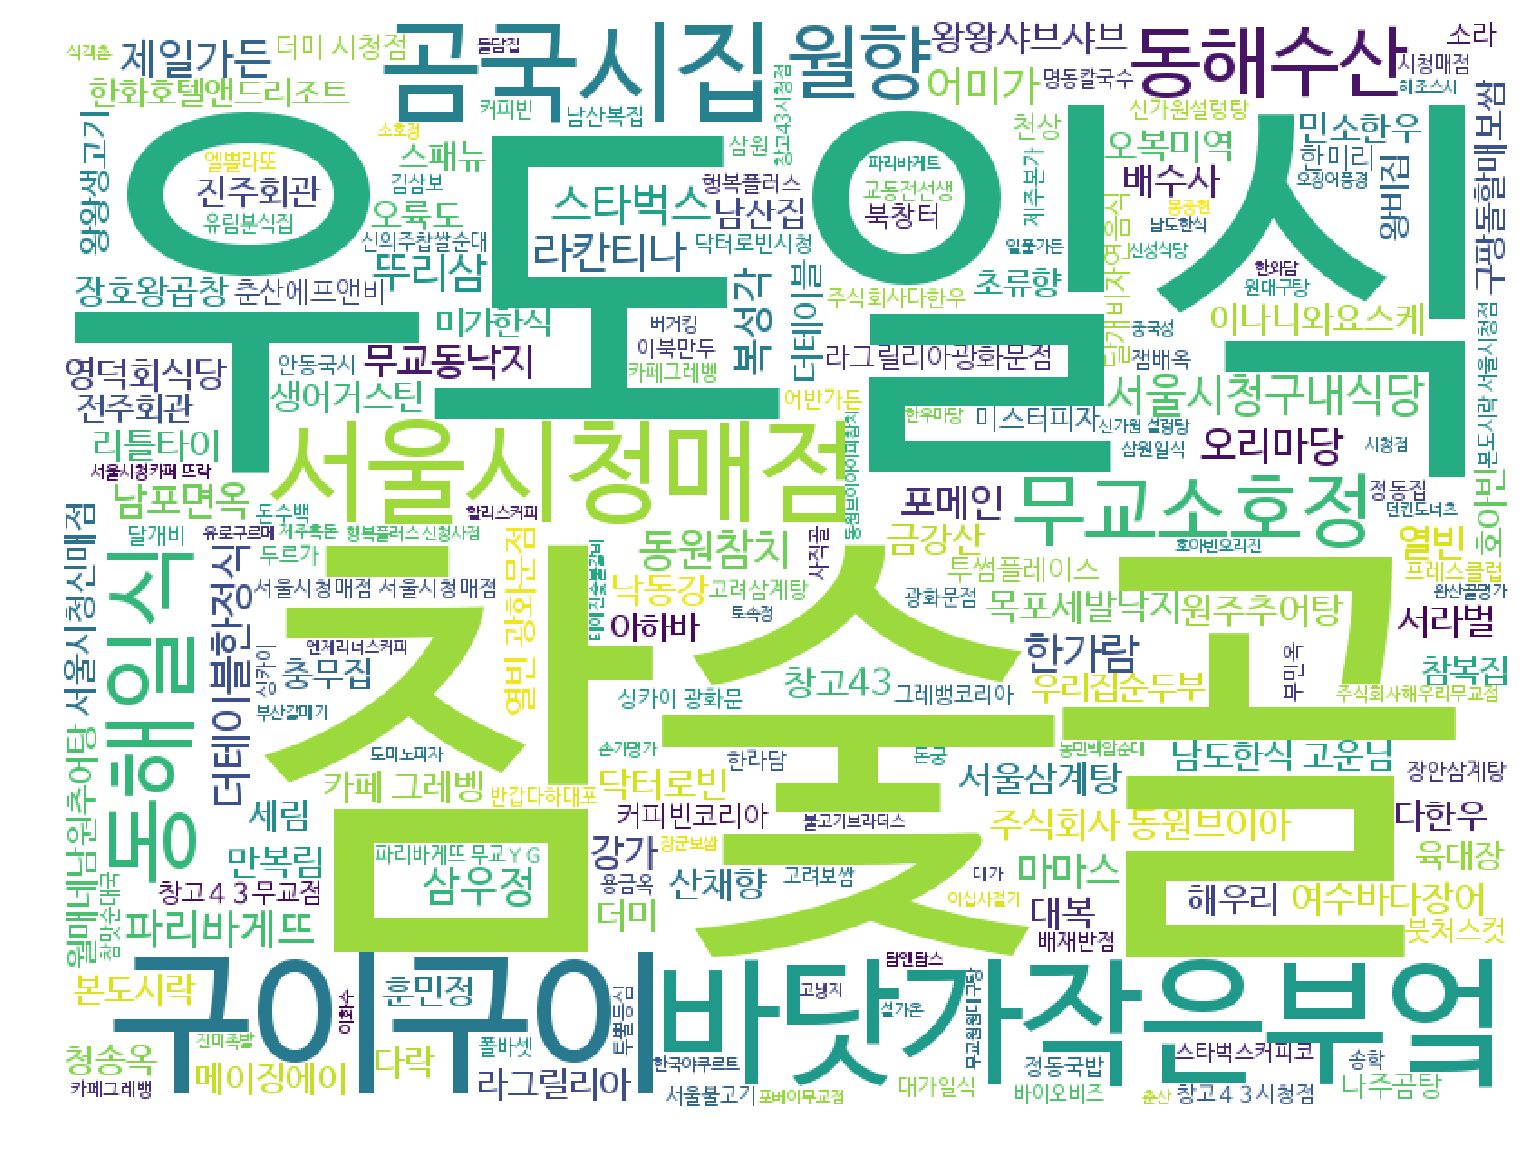

In [28]:
displayWordCloud(' '.join(df_shop['상호명']))